Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - loss: 0.1718 - val_loss: 0.1198
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0632 - val_loss: 0.0461
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0601 - val_loss: 0.0447
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0480 - val_loss: 0.0510
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0451 - val_loss: 0.0566
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0504 - val_loss: 0.0446
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0468 - val_loss: 0.0410
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0433 - val_loss: 0.0417
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0385 - val_loss: 0.0425
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0390 - val_loss: 0.0432
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0423 - val_loss: 0.0430
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0344 - val_loss: 0.0418
Epoch 13/50

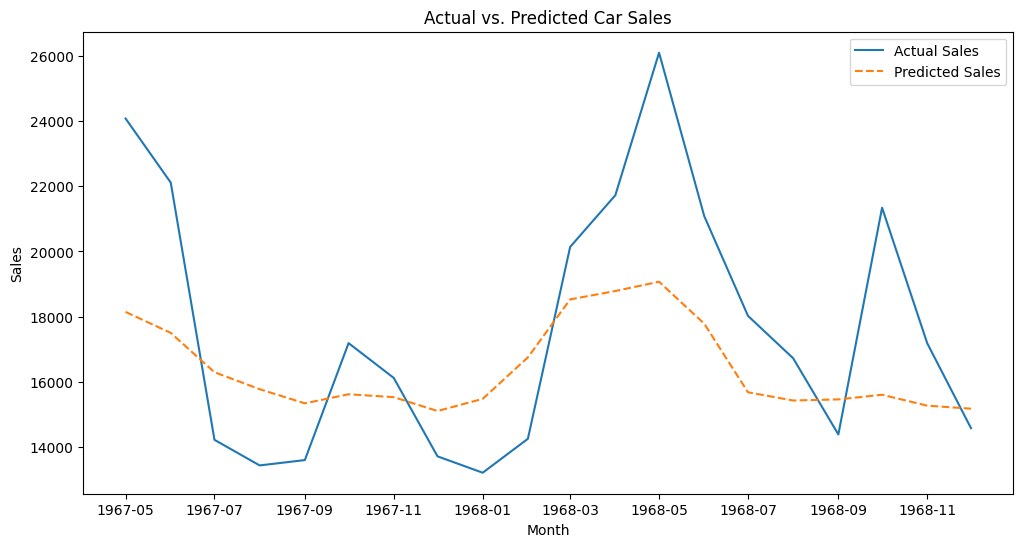

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv("monthly-car-sales.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Prepare sequences
def create_sequences(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_sequences(df_scaled, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual Sales")
plt.plot(df.index[-len(y_test):], y_pred_rescaled, label="Predicted Sales", linestyle="dashed")
plt.legend()
plt.title("Actual vs. Predicted Car Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


SAARIMA ANALYSIS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-2-f118a259fcd5>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq="M"), forecast, label="Forecasted Sales", linestyle="dashed")


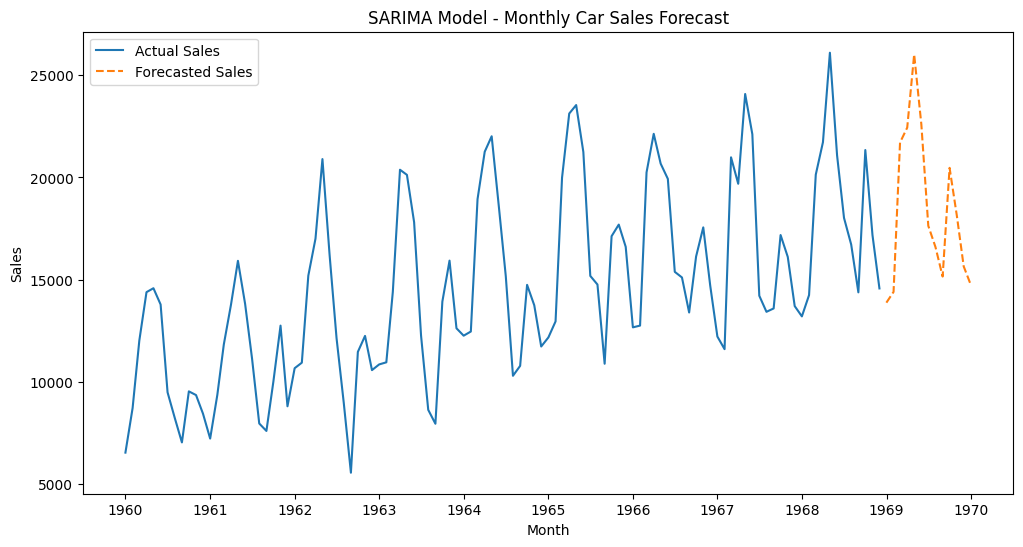

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
df = pd.read_csv("monthly-car-sales.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Fit SARIMA model
sarima_model = SARIMAX(df["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future values
forecast = sarima_result.predict(start=len(df), end=len(df) + 12, dynamic=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Sales"], label="Actual Sales")
plt.plot(pd.date_range(df.index[-1], periods=13, freq="M"), forecast, label="Forecasted Sales", linestyle="dashed")
plt.legend()
plt.title("SARIMA Model - Monthly Car Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


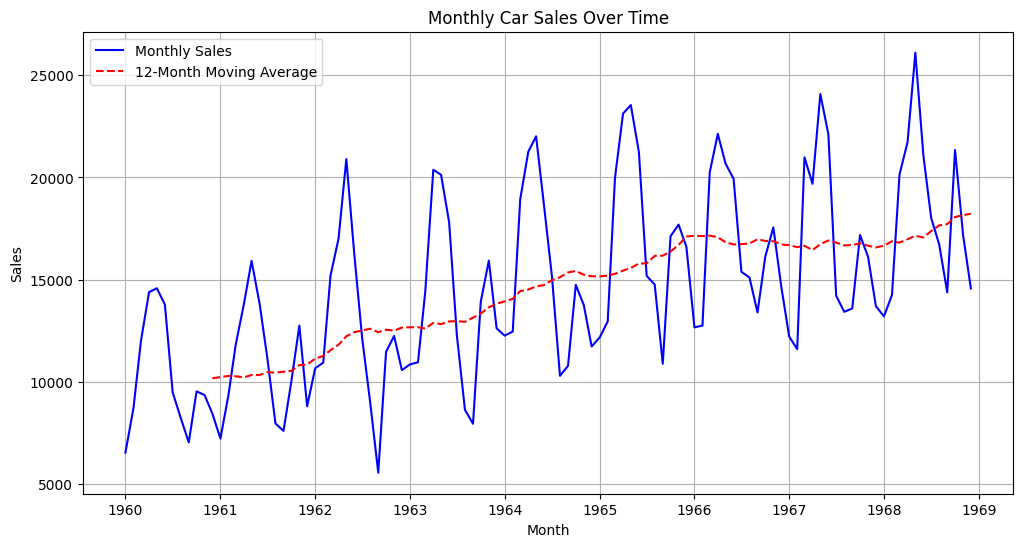

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("monthly-car-sales.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Sales"], label="Monthly Sales", color="blue")

# Add a moving average (12-month rolling)
df["Sales_MA"] = df["Sales"].rolling(window=12).mean()
plt.plot(df.index, df["Sales_MA"], label="12-Month Moving Average", color="red", linestyle="dashed")

# Customize the plot
plt.title("Monthly Car Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


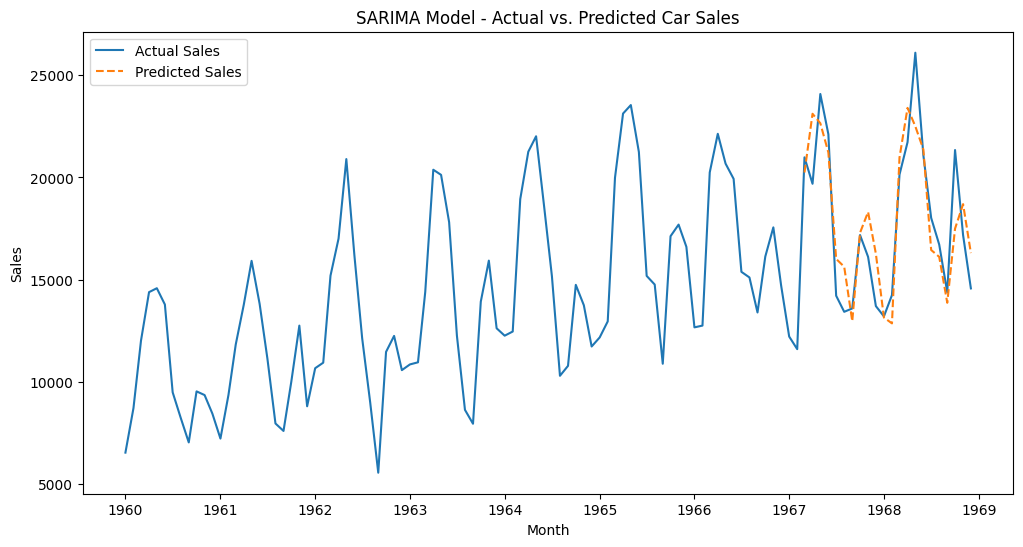

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
df = pd.read_csv("monthly-car-sales.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Split into training (80%) and testing (20%) sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train["Sales"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast on test set
test_predictions = sarima_result.predict(start=len(train), end=len(df)-1, dynamic=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Sales"], label="Actual Sales")
plt.plot(test.index, test_predictions, label="Predicted Sales", linestyle="dashed")
plt.legend()
plt.title("SARIMA Model - Actual vs. Predicted Car Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()
